In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

# 다운로드 파일 저장 위치 설정 (절대경로로 설정해줘야 하나 봄)
prefs = {'download.default_directory':r'/home/sangbeom/workspace/EDA/data/gas_station',
         'download.prompt_for_download':False}
        
options.add_experimental_option('prefs',prefs)

url = 'https://www.opinet.co.kr/searRgSelect.do#'
driver = webdriver.Chrome(service=Service('./../driver/chromedriver-linux64/chromedriver'),
                          options=options)
driver.get(url)

In [2]:
driver.get(url)

In [3]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, 'SIDO_NM0')
sido_list = sido.find_elements(By.TAG_NAME, 'option')
for idx, sido_name in enumerate(sido_list):
    print(sido_name.get_attribute('value'))


서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원특별자치도
충청북도
충청남도
전북특별자치도
전라남도
경상북도
경상남도
제주특별자치도


In [4]:
sido_names = [sido_name.get_attribute('value') for sido_name in sido_list]
sido_names


['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [5]:
sido_names = sido_names[1:]

In [6]:
sido.send_keys(sido_names[0])

In [7]:
gu = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list = gu.find_elements(By.TAG_NAME, 'option')
gu_names = [gu_name.get_attribute('value') for gu_name in gu_list]
gu_names

['',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [8]:
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [9]:
gu.send_keys(gu_names[15])

In [10]:
import time
from tqdm.notebook import tqdm

for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    gu.send_keys(gu_name)
    time.sleep(1)

  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
import time
from tqdm.notebook import tqdm

for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
driver.find_element(By.XPATH, '''//*[@id="templ_list0"]/div[7]/div/a''').click()

- 구의 엑셀파일을 다운로드

In [14]:
for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)
    driver.find_element(By.XPATH, '''//*[@id="templ_list0"]/div[7]/div/a''').click()

  0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
from glob import glob

len(glob('../data/gas_station/지역_*'))

7

In [17]:
import os 

for file in glob('../data/gas_station/지역_*'):
    os.remove(file)



In [18]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)

    save = WebDriverWait(driver, timeout=30).\
        until(EC.element_to_be_clickable((By.XPATH, '''//*[@id="templ_list0"]/div[7]/div/a''')))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)
    time.sleep(1)


  0%|          | 0/25 [00:00<?, ?it/s]

0

In [19]:
from glob import glob

file_list = glob('../data/gas_station/지역_*')
file_list

['../data/gas_station/지역_위치별(주유소) (17).xls',
 '../data/gas_station/지역_위치별(주유소) (4).xls',
 '../data/gas_station/지역_위치별(주유소) (7).xls',
 '../data/gas_station/지역_위치별(주유소) (23).xls',
 '../data/gas_station/지역_위치별(주유소) (11).xls',
 '../data/gas_station/지역_위치별(주유소) (20).xls',
 '../data/gas_station/지역_위치별(주유소) (1).xls',
 '../data/gas_station/지역_위치별(주유소) (8).xls',
 '../data/gas_station/지역_위치별(주유소) (21).xls',
 '../data/gas_station/지역_위치별(주유소).xls',
 '../data/gas_station/지역_위치별(주유소) (5).xls',
 '../data/gas_station/지역_위치별(주유소) (19).xls',
 '../data/gas_station/지역_위치별(주유소) (10).xls',
 '../data/gas_station/지역_위치별(주유소) (15).xls',
 '../data/gas_station/지역_위치별(주유소) (2).xls',
 '../data/gas_station/지역_위치별(주유소) (16).xls',
 '../data/gas_station/지역_위치별(주유소) (12).xls',
 '../data/gas_station/지역_위치별(주유소) (18).xls',
 '../data/gas_station/지역_위치별(주유소) (3).xls',
 '../data/gas_station/지역_위치별(주유소) (9).xls',
 '../data/gas_station/지역_위치별(주유소) (22).xls',
 '../data/gas_station/지역_위치별(주유소) (13).xls',
 '../data/gas_station/지

In [20]:
driver.close()

In [21]:
import pandas as pd

data = pd.read_excel(file_list[0], header=2)
data.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
26,서울특별시,(유)호림플러스홀딩스 남성주유소,서울 송파구 백제고분로 474,HD현대오일뱅크,02-423-5128,N,-,1757,1650,-
27,서울특별시,대신석유(주)진양주유소,서울 송파구 올림픽로 499 (풍납동),SK에너지,02-477-1906,N,2068,1968,1828,-


In [22]:
data_list = []

for file in file_list:
    data = pd.read_excel(file, header=2)
    data_list.append(data)

oil_data = pd.concat(data_list)
len(oil_data)

429

In [23]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 0 to 30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      429 non-null    object
 1   상호      429 non-null    object
 2   주소      429 non-null    object
 3   상표      429 non-null    object
 4   전화번호    429 non-null    object
 5   셀프여부    429 non-null    object
 6   고급휘발유   429 non-null    object
 7   휘발유     429 non-null    object
 8   경유      429 non-null    object
 9   실내등유    429 non-null    object
dtypes: object(10)
memory usage: 36.9+ KB


In [25]:
oil_data = pd.DataFrame({
    '상호':oil_data['상호'],
    '주소':oil_data['주소'],
    '가격':oil_data['휘발유'],
    '셀프':oil_data['셀프여부'],
    '상표':oil_data['상표']
})
oil_data.tail()

,상호,주소,가격,셀프,상표
26,대신석유(주)대우주유소,서울 서초구 양재대로 173 (양재동),1759,Y,SK에너지
27,지에스칼텍스(주)남서울주유소,서울 서초구 나루터로 83 (잠원동),1789,N,GS칼텍스
28,방배동주유소,서울 서초구 효령로 29 (방배동),1893,N,SK에너지
29,대신석유㈜서원주유소,서울 서초구 반포대로 142 (서초동),2068,N,SK에너지
30,(주)선문에너지 중앙주유소,서울특별시 서초구 바우뫼로 219 (양재1동),2168,N,S-OIL


In [26]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.tail()

,상호,주소,가격,셀프,상표
424,대신석유(주)대우주유소,서울 서초구 양재대로 173 (양재동),1759,Y,SK에너지
425,지에스칼텍스(주)남서울주유소,서울 서초구 나루터로 83 (잠원동),1789,N,GS칼텍스
426,방배동주유소,서울 서초구 효령로 29 (방배동),1893,N,SK에너지
427,대신석유㈜서원주유소,서울 서초구 반포대로 142 (서초동),2068,N,SK에너지
428,(주)선문에너지 중앙주유소,서울특별시 서초구 바우뫼로 219 (양재1동),2168,N,S-OIL


In [27]:
oil_data['구'] = [address.split()[1] for address in oil_data['주소']]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,남성대주유소,서울 송파구 송파대로 52 (장지동),1673,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1673,Y,S-OIL,송파구
2,위례드림주유소,서울시 송파구 위례중앙로 10,1673,Y,S-OIL,송파구
3,지에스이앤알 직영 송파제일주유소,서울 송파구 삼학사로 50 (석촌동),1673,Y,HD현대오일뱅크,송파구
4,상아주유소,서울 송파구 거마로 82,1673,Y,S-OIL,송파구


In [28]:
oil_data['구'].unique(), len(oil_data['구'].unique())

(array(['송파구', '관악구', '금천구', '중구', '동작구', '용산구', '강동구', '노원구', '은평구',
        '강남구', '광진구', '영등포구', '동대문구', '성동구', '강북구', '성북구', '마포구', '양천구',
        '강서구', '도봉구', '종로구', '서대문구', '구로구', '중랑구', '서초구'], dtype=object),
 25)

In [29]:
oil_data['가격'] = oil_data['가격'].astype('float')

ValueError: could not convert string to float: '-'

In [30]:
oil_data = oil_data[oil_data['가격'] != '-']
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,남성대주유소,서울 송파구 송파대로 52 (장지동),1673,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1673,Y,S-OIL,송파구
2,위례드림주유소,서울시 송파구 위례중앙로 10,1673,Y,S-OIL,송파구
3,지에스이앤알 직영 송파제일주유소,서울 송파구 삼학사로 50 (석촌동),1673,Y,HD현대오일뱅크,송파구
4,상아주유소,서울 송파구 거마로 82,1673,Y,S-OIL,송파구


In [31]:
oil_data['가격'] = oil_data['가격'].astype('float')

In [32]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 428
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      428 non-null    object 
 1   주소      428 non-null    object 
 2   가격      428 non-null    float64
 3   셀프      428 non-null    object 
 4   상표      428 non-null    object 
 5   구       428 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.4+ KB


In [33]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,남성대주유소,서울 송파구 송파대로 52 (장지동),1673.0,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1673.0,Y,S-OIL,송파구
2,위례드림주유소,서울시 송파구 위례중앙로 10,1673.0,Y,S-OIL,송파구
3,지에스이앤알 직영 송파제일주유소,서울 송파구 삼학사로 50 (석촌동),1673.0,Y,HD현대오일뱅크,송파구
4,상아주유소,서울 송파구 거마로 82,1673.0,Y,S-OIL,송파구


# 데이터 시각화

<Axes: title={'center': '가격'}, xlabel='셀프'>

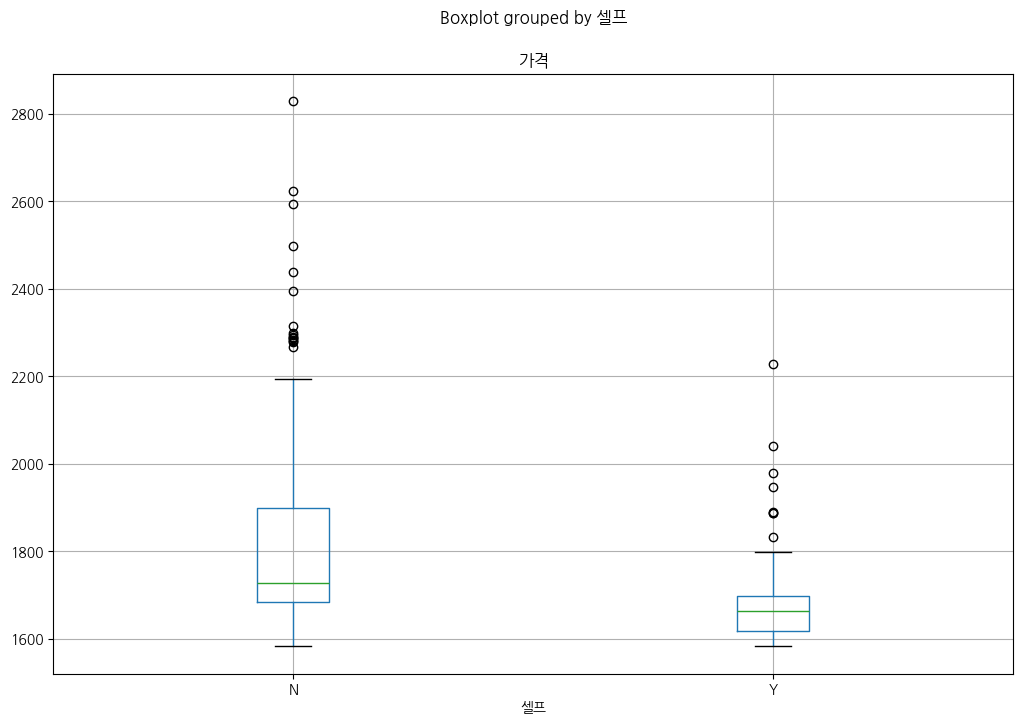

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

oil_data.boxplot(column='가격', by='셀프', figsize=(12, 8))

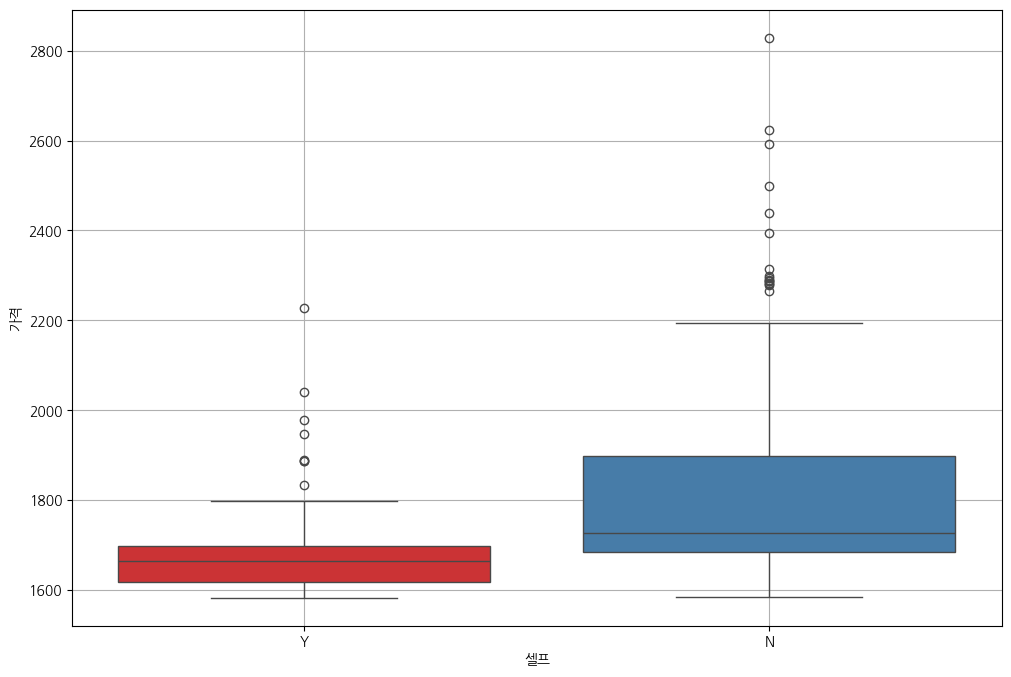

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x='셀프', y='가격', data=oil_data, hue='셀프', palette='Set1')
plt.grid(True)
plt.show()

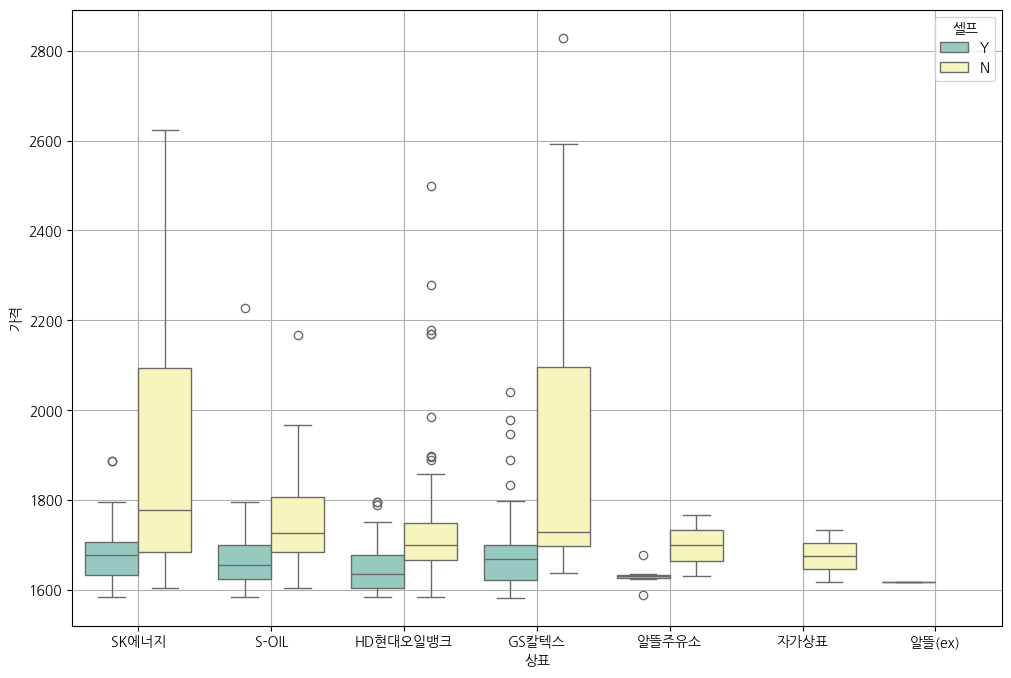

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', data=oil_data, hue='셀프', palette='Set3')
plt.grid(True)
plt.show()

# 지도 시각화

In [41]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
oil_data.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
82,서계주유소,서울 용산구 청파로 367 (청파동),2829.0,N,GS칼텍스,용산구
62,서남주유소,서울 중구 통일로 30,2623.0,N,SK에너지,중구
154,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2593.0,N,GS칼텍스,강남구
153,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2498.0,N,HD현대오일뱅크,강남구
61,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구
152,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
350,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2315.0,N,GS칼텍스,종로구
349,SK북악주유소,서울 종로구 평창문화로 137,2298.0,N,SK에너지,종로구
193,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
383,구로주유소,서울 구로구 구로동로 137 (구로동),2290.0,N,GS칼텍스,구로구


In [43]:
oil_data.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
237,원천주유소,서울 성북구 돌곶이로 142 (장위동),1583.0,Y,GS칼텍스,성북구
366,씨앤에스유통(주) 구로드림주유소,서울 구로구 경인로 41 (온수동),1584.0,Y,S-OIL,구로구
329,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1585.0,Y,S-OIL,도봉구
331,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1585.0,Y,SK에너지,도봉구
330,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1585.0,Y,HD현대오일뱅크,도봉구
332,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1585.0,Y,S-OIL,도봉구
333,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1585.0,N,HD현대오일뱅크,도봉구
328,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1585.0,Y,HD현대오일뱅크,도봉구
229,덕릉로주유소,서울 강북구 덕릉로 158 (번동),1585.0,Y,S-OIL,강북구
232,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1585.0,Y,HD현대오일뱅크,강북구


In [45]:
import numpy as np

gu_data = pd.pivot_table(data=oil_data, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1927.000000
강동구,1782.692308
강북구,1609.909091
강서구,1690.151515
관악구,1743.571429


In [47]:
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    key_on='properties.name',
    fill_color='PuRd')
setting.add_to(map)
map